# 📊 About the Dataset

**Synthetic Dataset for Risk Assessment and Loan Approval Modeling**  
This synthetic dataset comprises **20,000 records** of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

1. **Risk Score Regression**  
   Predict a continuous risk score indicating the likelihood of loan default or financial instability.

2. **Binary Classification**  
   Predict whether a loan application is likely to be **approved or denied**.

---

## 🧾 Dataset Description

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics. This provides a comprehensive foundation for sophisticated data-driven analysis and decision-making.

---

## 🗂️ Columns Overview

- **ApplicationDate**: Loan application date  
- **Age**: Applicant's age  
- **AnnualIncome**: Yearly income  
- **CreditScore**: Creditworthiness score  
- **EmploymentStatus**: Job situation  
- **EducationLevel**: Highest education attained  
- **Experience**: Work experience in years  
- **LoanAmount**: Requested loan amount  
- **LoanDuration**: Loan repayment duration (months)  
- **MaritalStatus**: Applicant's marital status  
- **NumberOfDependents**: Number of dependents  
- **HomeOwnershipStatus**: Type of homeownership  
- **MonthlyDebtPayments**: Monthly debt obligations  
- **CreditCardUtilizationRate**: Percentage of credit card utilization  
- **NumberOfOpenCreditLines**: Number of open credit lines  
- **NumberOfCreditInquiries**: Number of recent credit inquiries  
- **DebtToIncomeRatio**: Ratio of debt to income  
- **BankruptcyHistory**: Indicator of previous bankruptcies  
- **LoanPurpose**: Purpose of the loan  
- **PreviousLoanDefaults**: Number of previous defaults  
- **PaymentHistory**: Payment history score  
- **LengthOfCreditHistory**: Duration of credit history  
- **SavingsAccountBalance**: Current savings account balance  
- **CheckingAccountBalance**: Current checking account balance  
- **TotalAssets**: Total value of owned assets  
- **TotalLiabilities**: Total amount of liabilities  
- **MonthlyIncome**: Monthly income  
- **UtilityBillsPaymentHistory**: Utility bill payment history  
- **JobTenure**: Duration at current job (in years)  
- **NetWorth**: Net worth = Total assets − liabilities  
- **BaseInterestRate**: Base interest rate before adjustment  
- **InterestRate**: Final applied interest rate  
- **MonthlyLoanPayment**: Monthly loan repayment amount  
- **TotalDebtToIncomeRatio**: Total debt relative to income  
- **LoanApproved**: Binary indicator (1 = approved, 0 = denied)  
- **RiskScore**: Predicted risk score for financial behavior

---

📎 **Source:** [Kaggle Dataset – Financial Risk for Loan Approval](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv('Loan.csv')
data.head(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
#### Shape of the dataset
data.shape

(20000, 36)

In [4]:
#### columns in the dataset
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
##check missing values
data.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [6]:
##check for duplicates
data.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [8]:
###check the unique values for each column
data.nunique()

ApplicationDate               20000
Age                              63
AnnualIncome                  17516
CreditScore                     322
EmploymentStatus                  3
EducationLevel                    5
Experience                       62
LoanAmount                    15578
LoanDuration                     10
MaritalStatus                     4
NumberOfDependents                6
HomeOwnershipStatus               4
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
LoanPurpose                       5
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory  

In [9]:
###check statistics of the dataset for numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


###  Exploring Data

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 30 numerical features : ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

We have 6 categorical features : ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [11]:
print("Categories in 'employment' variable:     ",end=" " )
print(data['EmploymentStatus'].unique())

Categories in 'employment' variable:      ['Employed' 'Self-Employed' 'Unemployed']


In [12]:
print("Categories in 'EducationLevel' variable:     ", end=" ")
print(data['EducationLevel'].unique())

Categories in 'EducationLevel' variable:      ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']


In [13]:
print("Categories in 'MaritalStatus' variable:     ")
print(data['MaritalStatus'].unique())

Categories in 'MaritalStatus' variable:     
['Married' 'Single' 'Divorced' 'Widowed']


In [14]:
print("Categories in 'HomeOwnershipStatus' variable:     ")
print(data['HomeOwnershipStatus'].unique())

Categories in 'HomeOwnershipStatus' variable:     
['Own' 'Mortgage' 'Rent' 'Other']


In [15]:

print("Categories in 'LoanPurpose' variable:     ")
print(data['LoanPurpose'].unique())

Categories in 'LoanPurpose' variable:     
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


### Exploring Data ( Visualization )

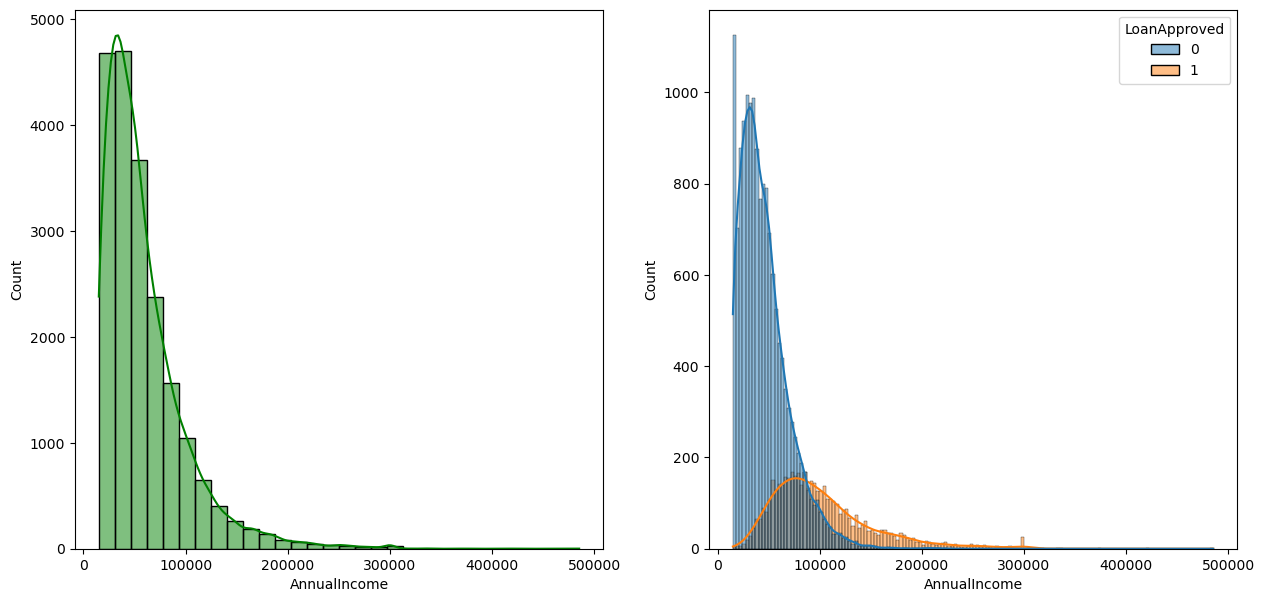

In [16]:
##histogram of Annualincome distribution against LoanApproved
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='AnnualIncome',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='AnnualIncome',kde=True,hue='LoanApproved')
plt.show()

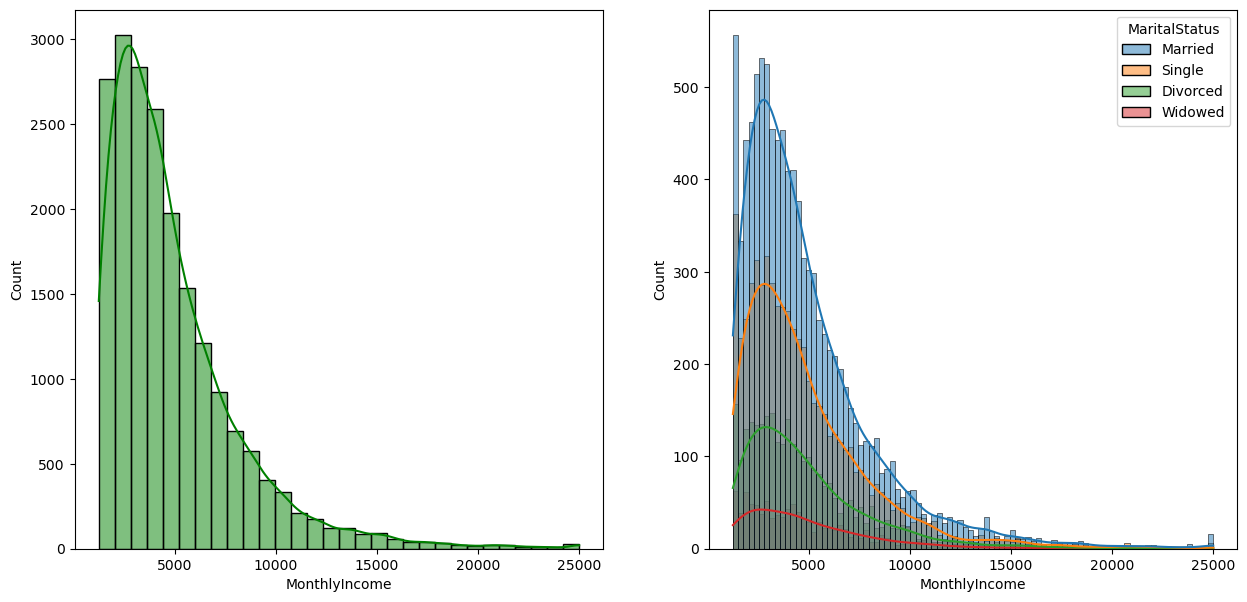

In [17]:
##histogram of MonthlyIncome distribution against Maritalstatus
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='MonthlyIncome',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='MonthlyIncome',kde=True,hue='MaritalStatus')
plt.show()

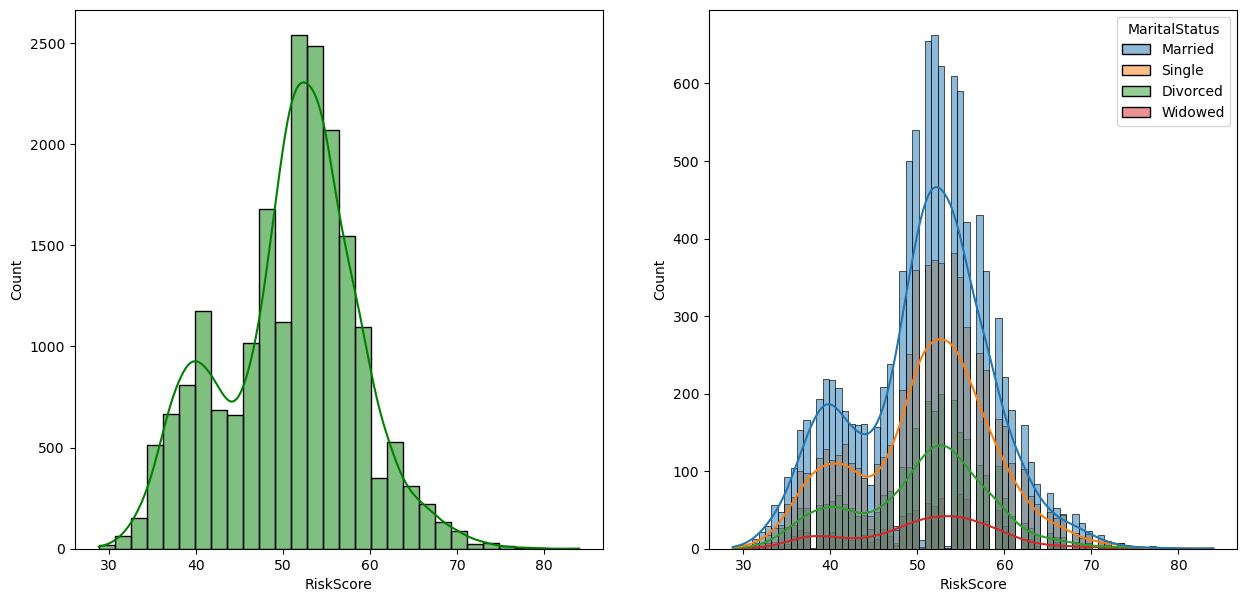

In [18]:
##histogram of Riskscore  distribution against Maritalstatus
fig,ax =plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data =data,x = 'RiskScore', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data =data,x = 'RiskScore',kde=True, hue = 'MaritalStatus')
plt.show()

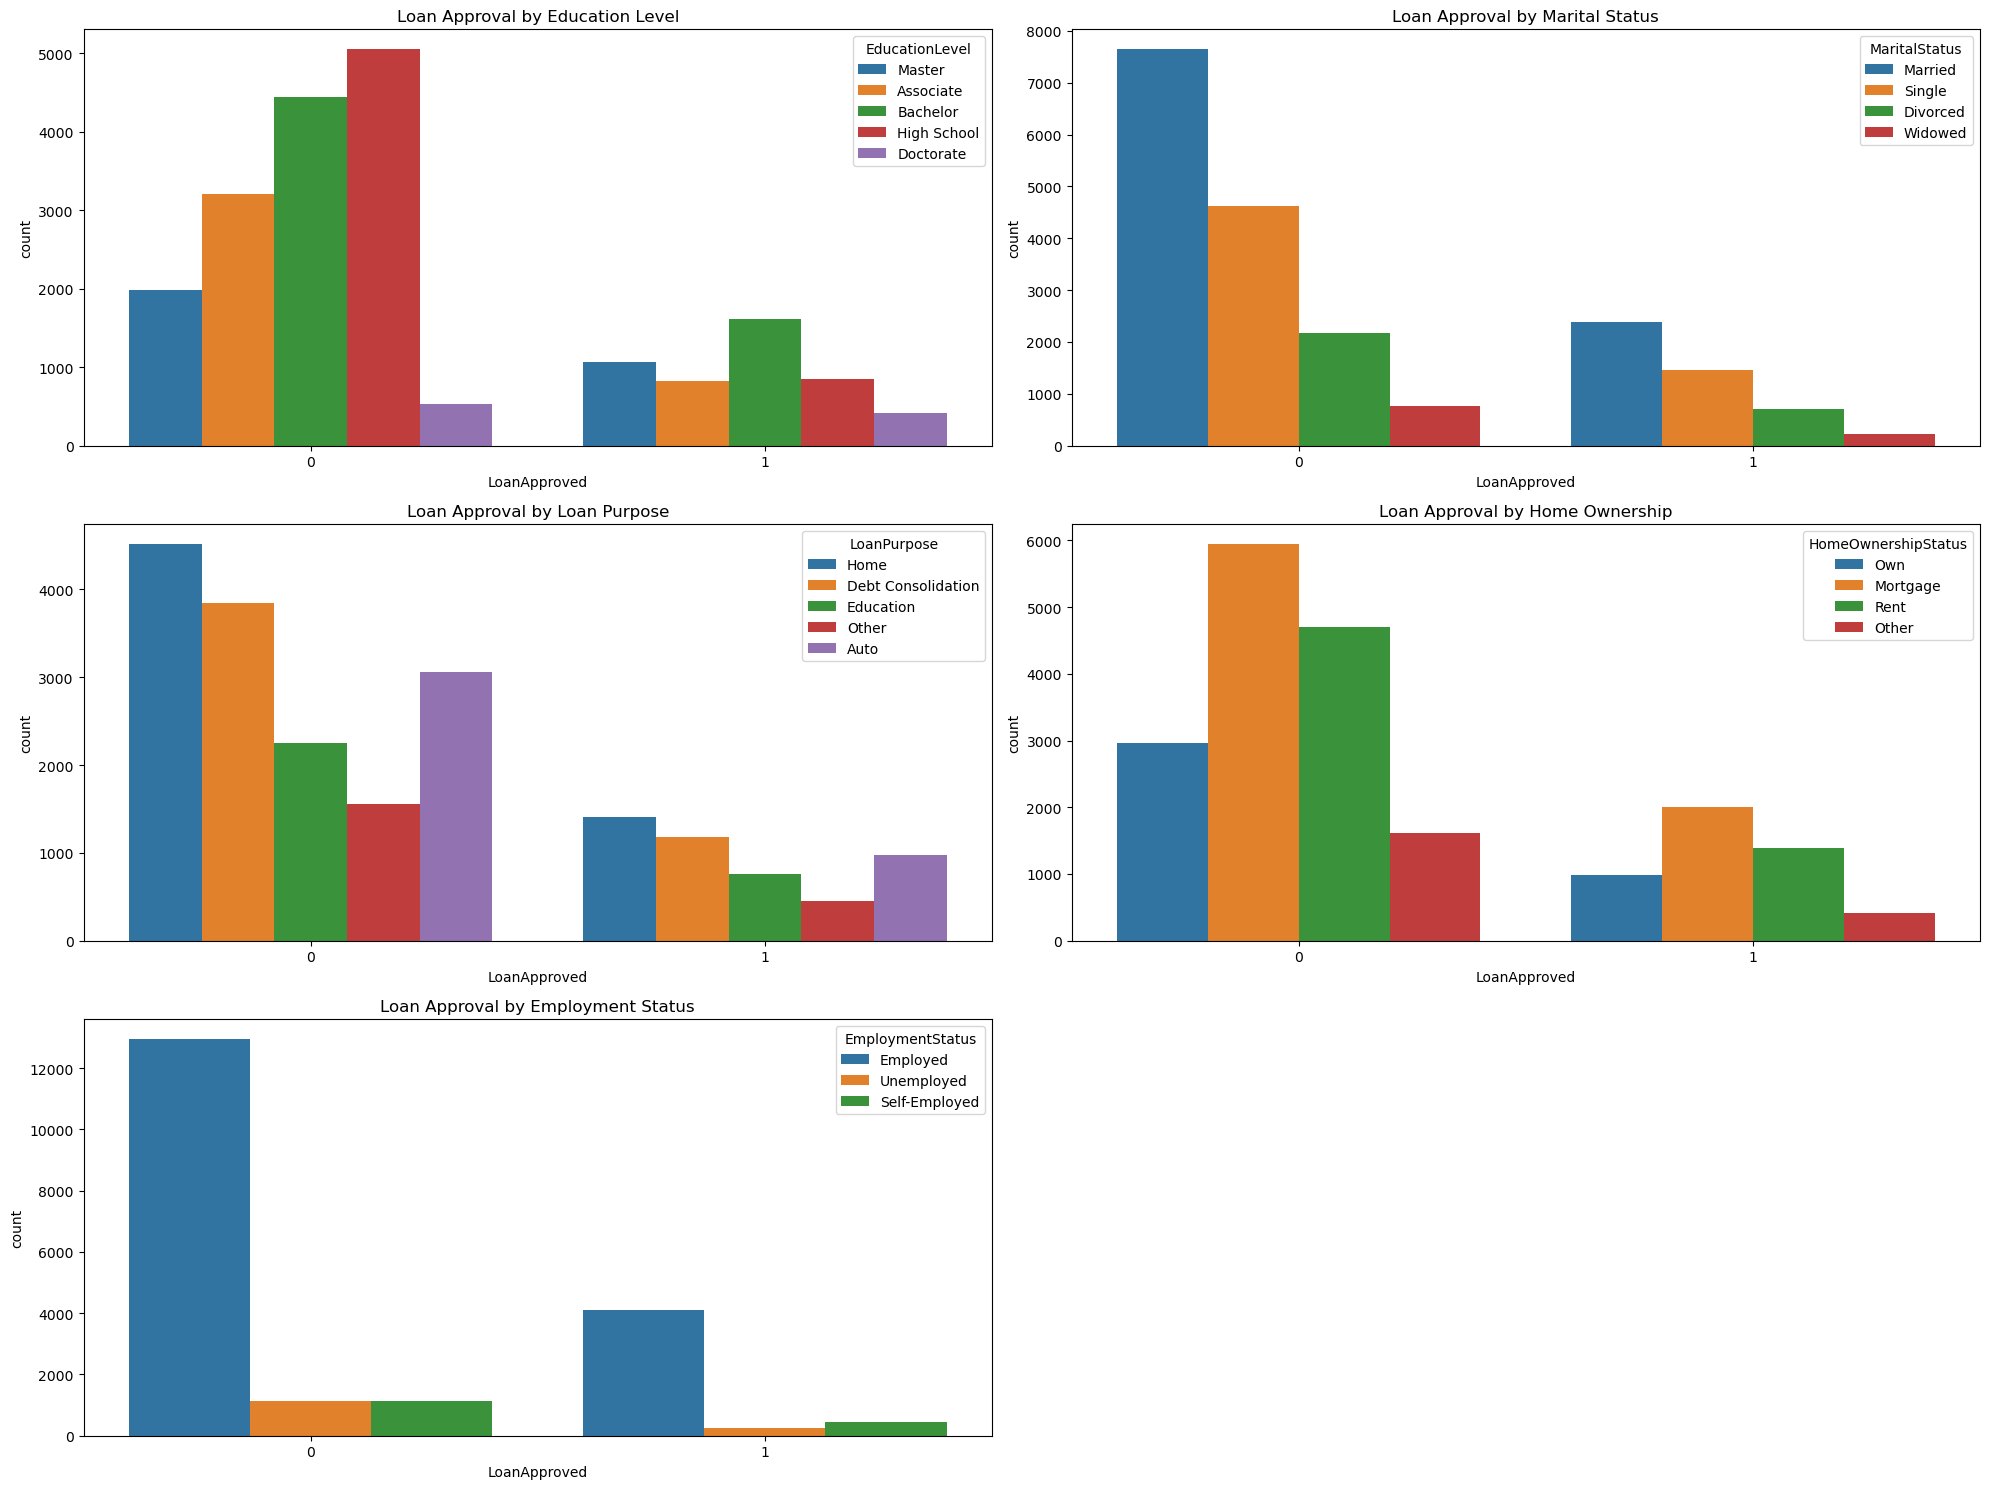

In [19]:
# Create 3 rows × 2 columns of subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# Flatten the 2D array of axes into a 1D list
axes = ax.flatten()

# Plot 1: Education Level
sns.countplot(data=data, x='LoanApproved', hue='EducationLevel', ax=axes[0])
axes[0].set_title("Loan Approval by Education Level")

# Plot 2: Marital Status
sns.countplot(data=data, x='LoanApproved', hue='MaritalStatus', ax=axes[1])
axes[1].set_title("Loan Approval by Marital Status")

# Plot 3: Loan Purpose
sns.countplot(data=data, x='LoanApproved', hue='LoanPurpose', ax=axes[2])
axes[2].set_title("Loan Approval by Loan Purpose")

# Plot 4: Home Ownership Status
sns.countplot(data=data, x='LoanApproved', hue='HomeOwnershipStatus', ax=axes[3])
axes[3].set_title("Loan Approval by Home Ownership")

# Plot 5: Employment Status
sns.countplot(data=data, x='LoanApproved', hue='EmploymentStatus', ax=axes[4])
axes[4].set_title("Loan Approval by Employment Status")

# Hide unused subplot (axes[5])
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()



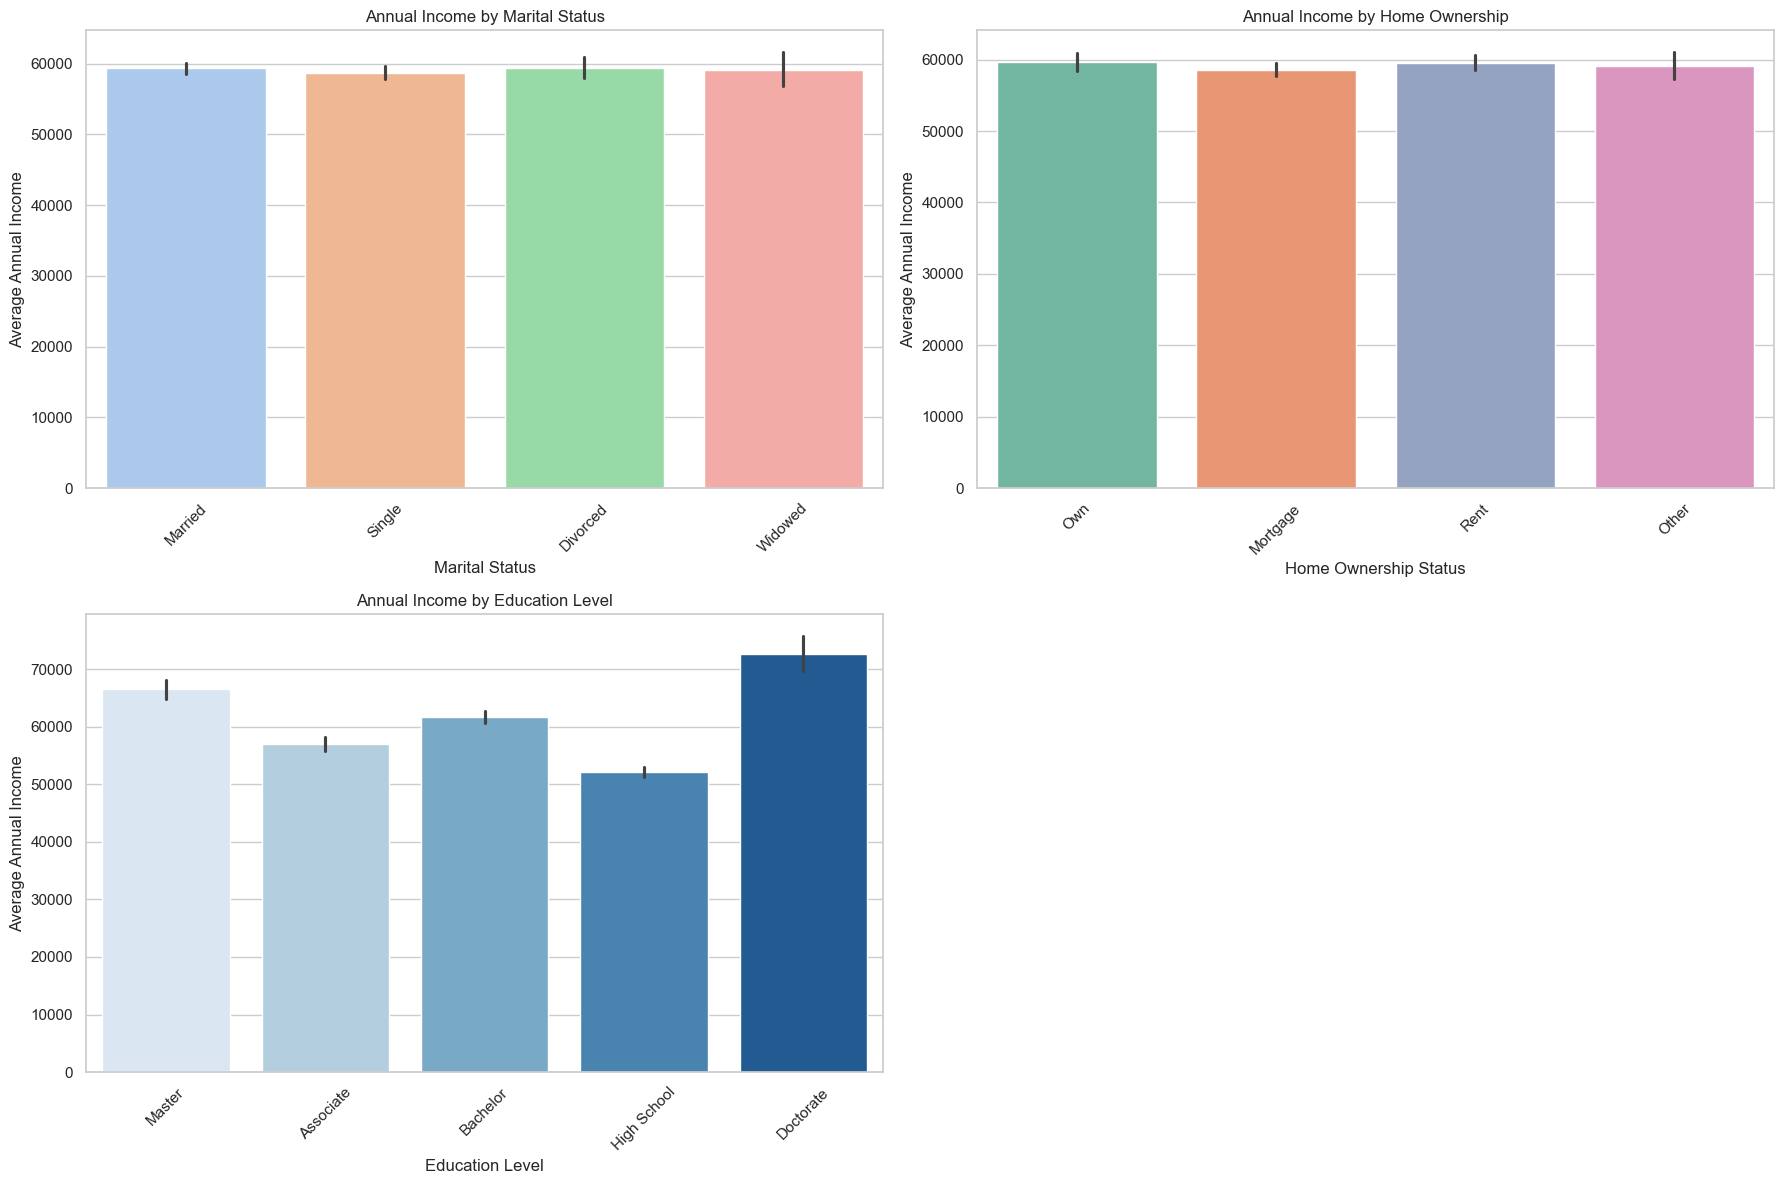

In [20]:

# Set overall style
sns.set(style="whitegrid")

# Create 2 rows × 2 columns of subplots (only using 3)
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
axes = ax.flatten()
# bar plot shows the average, but can also the true sum sns.barplot(data=data, x='EducationLevel', y='AnnualIncome', estimator=np.sum)
# First plot – Marital Status with "pastel"
sns.barplot(data=data, x='MaritalStatus', y='AnnualIncome', palette="pastel", ax=axes[0])
axes[0].set_title("Annual Income by Marital Status")
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Average Annual Income")
axes[0].tick_params(axis='x', rotation=45)

# Second plot – Home Ownership with "Set2"
sns.barplot(data=data, x='HomeOwnershipStatus', y='AnnualIncome', palette="Set2", ax=axes[1])
axes[1].set_title("Annual Income by Home Ownership")
axes[1].set_xlabel("Home Ownership Status")
axes[1].set_ylabel("Average Annual Income")
axes[1].tick_params(axis='x', rotation=45)

# Third plot – Education Level with "Blues"
sns.barplot(data=data, x='EducationLevel', y='AnnualIncome', palette="Blues", ax=axes[2])
axes[2].set_title("Annual Income by Education Level")
axes[2].set_xlabel("Education Level")
axes[2].set_ylabel("Average Annual Income")
axes[2].tick_params(axis='x', rotation=45)

# Hide unused subplot (axes[3])
fig.delaxes(axes[3])

# Adjust layout
plt.tight_layout()
plt.show()


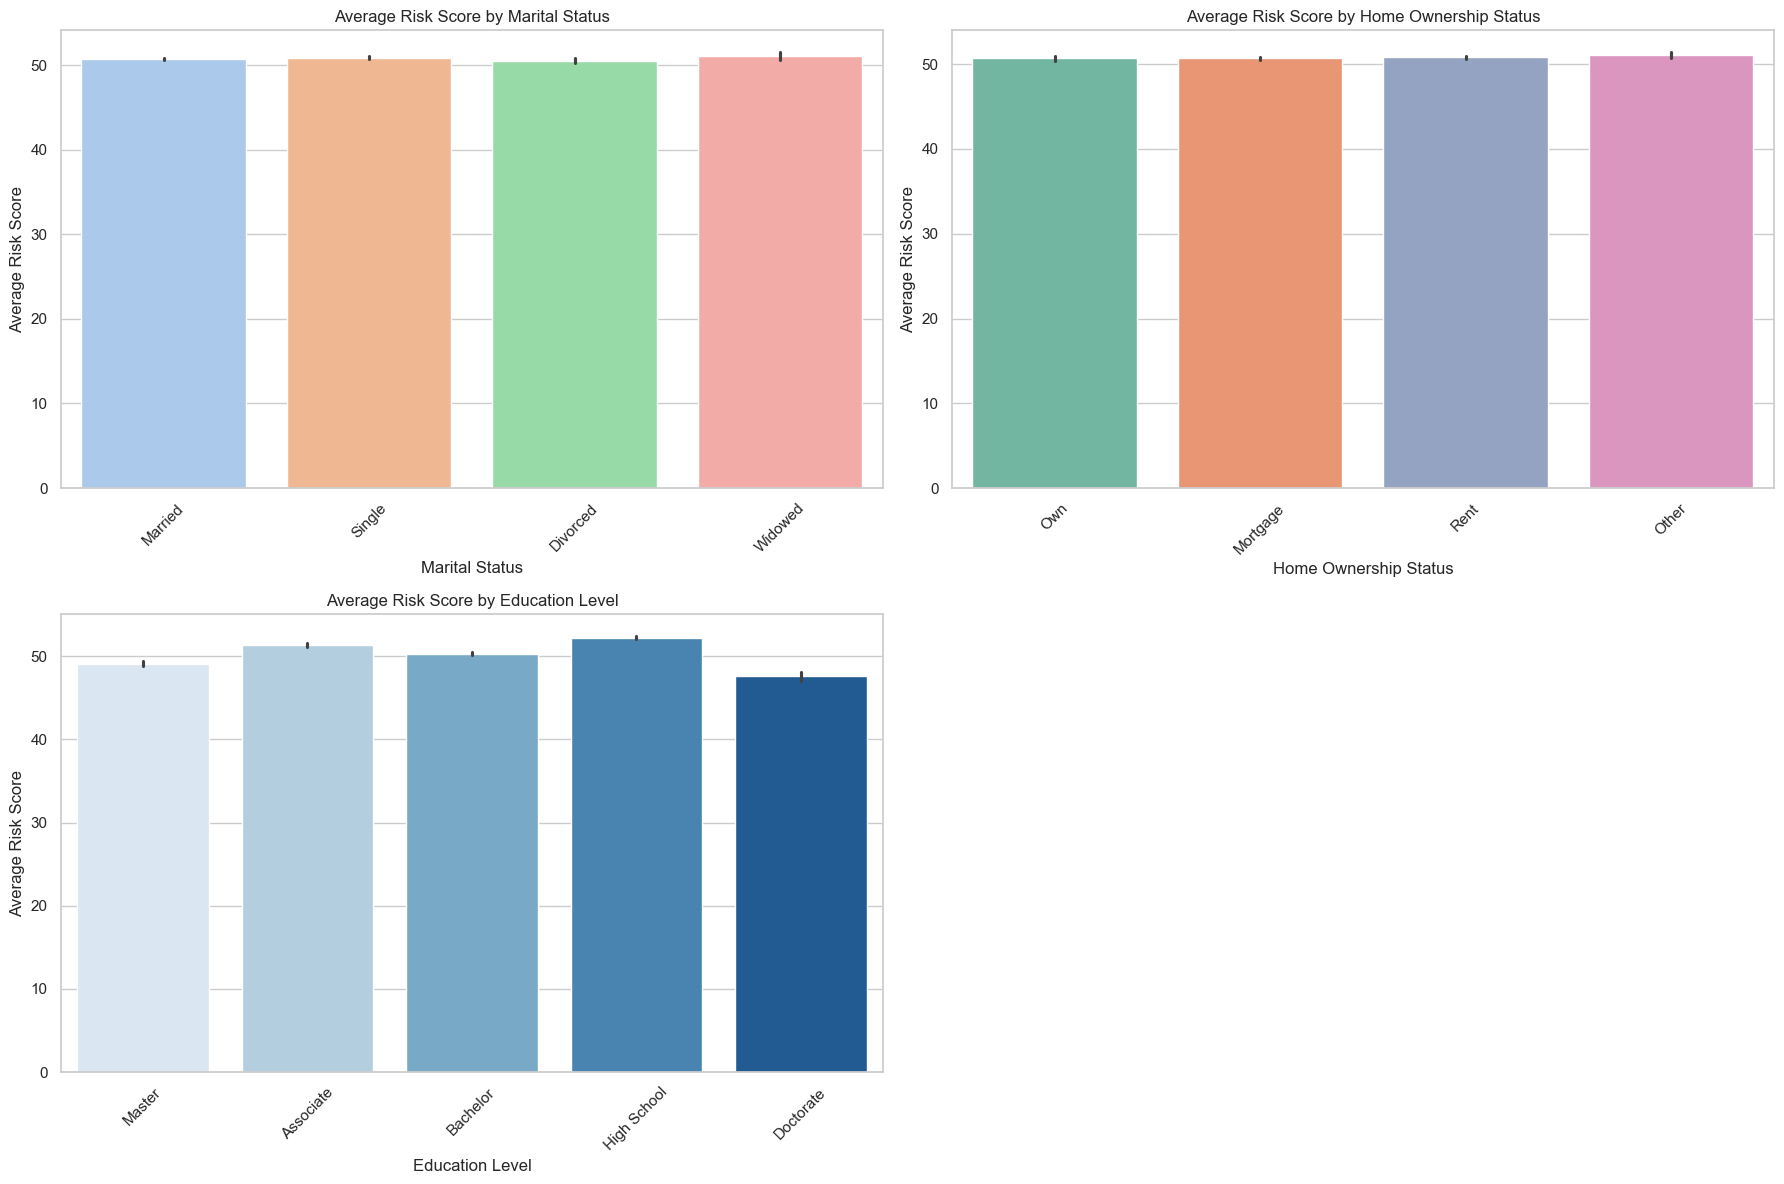

In [21]:
# Set overall style
sns.set(style="whitegrid")

# Create 2 rows × 2 columns of subplots (only using 3)
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
axes = ax.flatten()

# First plot – Marital Status with "pastel"
sns.barplot(data=data, x='MaritalStatus', y='RiskScore', palette="pastel", ax=axes[0])
axes[0].set_title("Average Risk Score by Marital Status")
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Average Risk Score")
axes[0].tick_params(axis='x', rotation=45)

# Second plot – Home Ownership with "Set2"
sns.barplot(data=data, x='HomeOwnershipStatus', y='RiskScore', palette="Set2", ax=axes[1])
axes[1].set_title("Average Risk Score by Home Ownership Status")
axes[1].set_xlabel("Home Ownership Status")
axes[1].set_ylabel("Average Risk Score")
axes[1].tick_params(axis='x', rotation=45)

# Third plot – Education Level with "Blues"
sns.barplot(data=data, x='EducationLevel', y='RiskScore', palette="Blues", ax=axes[2])
axes[2].set_title("Average Risk Score by Education Level")
axes[2].set_xlabel("Education Level")
axes[2].set_ylabel("Average Risk Score")
axes[2].tick_params(axis='x', rotation=45)

# Hide unused subplot (axes[3])
fig.delaxes(axes[3])

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
# Cross-tab between Marital Status and Loan Approved
# shows percentage loan approjved and rejected
# similar to the count plot
loan_marital = pd.crosstab(data['MaritalStatus'], data['LoanApproved'], normalize='index') *100
loan_marital

LoanApproved,0,1
MaritalStatus,,
Divorced,75.503123,24.496877
Married,76.147794,23.852206
Single,76.061204,23.938796
Widowed,77.577578,22.422422


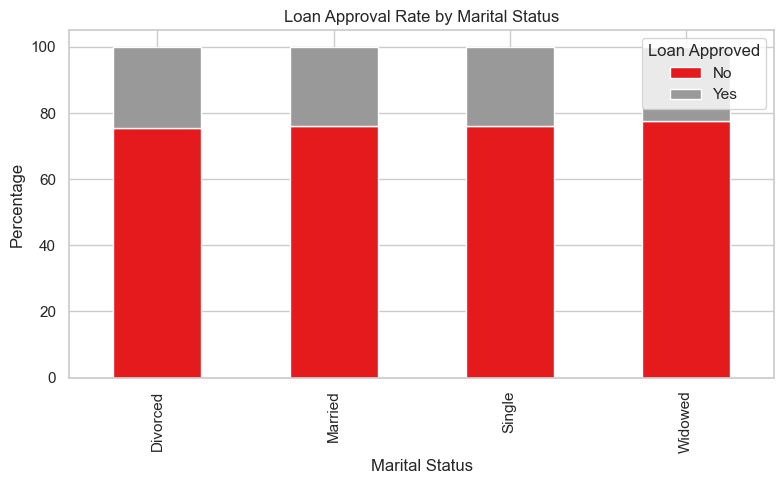

In [23]:
loan_marital.plot(kind='bar', stacked=True, colormap='Set1', figsize=(8, 5))
plt.title("Loan Approval Rate by Marital Status")
plt.ylabel("Percentage")
plt.xlabel("Marital Status")
plt.legend(title="Loan Approved", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


In [24]:
# Cross-tab between educational level  and Loan Approved
# 0 is rejected and 1 is granted
loan_education = pd.crosstab(data['EducationLevel'], data['LoanApproved'], normalize='index') *100
loan_education

LoanApproved,0,1
EducationLevel,,
Associate,79.573624,20.426376
Bachelor,73.356459,26.643541
Doctorate,55.974843,44.025157
High School,85.561950,14.438050
Master,64.918033,35.081967


### FEATURE ENGINEERING

- Application This is a timestamp column that contains the loan application date. Since no time-series or trend-based analysis is being performed, it provides no predictive value for loan approval or risk scoring.
- Monthly income This column is highly correlated with MonthlyIncome. Keeping both introduces redundancy. For most modeling and interpretation tasks, MonthlyIncome is more intuitive and consistent with other financial metrics.
- BaseInterestRate This feature likely represents a preliminary or benchmark interest rate before adjustments. The final applied rate is already captured by InterestRate, which is the more relevant and actionable feature for modeling.
- NetWorth a derived feature from TotalAssets - TotalLiabilities, both of which are already present in the dataset. Retaining only the base components helps avoid data leakage and redundancy.
- DebtToIncomeRatio and MonthlyDebtPayments all speak towards debt against income, which is also covered by TotalDebtToIncomeRatio which encompasses all debt inclusing mortgage
- NumberOfCreditInquiries while important but to reduce dimensionality, the column is dropped as it only checks how many times, the customer inquired about credilines

The Task is going to calculate a regression score for Rskscore, hence dropping the loanapproved column


In [25]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [26]:
drop_cols = ['ApplicationDate', 'MonthlyIncome', 'BaseInterestRate', 'NetWorth', 'LoanApproved','DebtToIncomeRatio','MonthlyDebtPayments' ]
df = data.drop(columns=drop_cols)


In [27]:
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'RiskScore'],
      dtype='object')

In [28]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,7632,1202,146111,19183,0.724972,11,0.227590,419.805992,0.181077,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,4627,3460,53204,9595,0.935132,3,0.201077,794.054238,0.389852,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,886,895,25176,128874,0.872241,6,0.212548,666.406688,0.462157,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,1675,1217,104822,5370,0.896155,5,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,1555,4981,244305,17286,0.941369,5,0.175990,330.179140,0.070210,36.0


In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [30]:
categorical_features

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose']

In [31]:
for i in categorical_features:
    print(df[i].unique())
    print('-' * 50)

['Employed' 'Self-Employed' 'Unemployed']
--------------------------------------------------
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
--------------------------------------------------
['Married' 'Single' 'Divorced' 'Widowed']
--------------------------------------------------
['Own' 'Mortgage' 'Rent' 'Other']
--------------------------------------------------
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']
--------------------------------------------------


In [32]:
numeric_features=numeric_features[:-1]

In [33]:
from scipy.stats import zscore

# Keep only rows where all selected columns have z-scores < 3 (common threshold)
#df = df[(zscore(df[numeric_features]) < 3).all(axis=1)]

# Loop through columns and apply IQR filtering
for col in numeric_features :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #  print how many rows are outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


##leave the outliers as there is no domain knowledge about any of the column except age

Age: 64 outliers
AnnualIncome: 947 outliers
CreditScore: 242 outliers
Experience: 75 outliers
LoanAmount: 746 outliers
LoanDuration: 0 outliers
NumberOfDependents: 0 outliers
CreditCardUtilizationRate: 130 outliers
NumberOfOpenCreditLines: 249 outliers
NumberOfCreditInquiries: 16 outliers
BankruptcyHistory: 1048 outliers
PreviousLoanDefaults: 2001 outliers
PaymentHistory: 241 outliers
LengthOfCreditHistory: 0 outliers
SavingsAccountBalance: 1592 outliers
CheckingAccountBalance: 1522 outliers
TotalAssets: 1442 outliers
TotalLiabilities: 1533 outliers
UtilityBillsPaymentHistory: 294 outliers
JobTenure: 251 outliers
InterestRate: 222 outliers
MonthlyLoanPayment: 1089 outliers
TotalDebtToIncomeRatio: 1152 outliers


In [34]:
##check for multicollinearity
def correlation(dataset, threshold):
    # Store columns with correlations above threshold and their paired columns
    high_corr_cols = set()
    high_corr_pairs = []
    
    # Calculate correlation matrix once
    corr_matrix = dataset.corr()
    
    # Find columns with high correlation and identify the pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i,j]
                
                # Add both columns to the set of high correlation columns
                high_corr_cols.add(col_i)
                high_corr_cols.add(col_j)
                
                # Store the pair and their correlation value
                high_corr_pairs.append((col_i, col_j, corr_value))
    
    # Calculate VIF for numeric columns if statsmodels is available
    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        numeric_data = dataset.select_dtypes(include=[np.number]).dropna()
        
        # Calculate VIF values
        vif_values = {}
        for i, column in enumerate(numeric_data.columns):
            vif_values[column] = variance_inflation_factor(numeric_data.values, i)
        
        # Return comprehensive results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs,
            'vif_values': vif_values
        }
    
    except ImportError:
        # If statsmodels is not available, just return correlation results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs
        }

In [35]:
##set threshold, 
correlation(df[numeric_features[:-1]], 0.85)

{'high_corr_columns': {'Age', 'Experience'},
 'high_corr_pairs': [('Experience', 'Age', 0.9829802792421133)],
 'vif_values': {'Age': 321.66455830391385,
  'AnnualIncome': 3.2302994118032777,
  'CreditScore': 97.03772783211483,
  'Experience': 85.75013612356297,
  'LoanAmount': 15.802615089835877,
  'LoanDuration': 13.30190821413972,
  'NumberOfDependents': 2.1958704496685115,
  'CreditCardUtilizationRate': 4.1951237120790035,
  'NumberOfOpenCreditLines': 4.018771657011887,
  'NumberOfCreditInquiries': 2.0093415683433387,
  'BankruptcyHistory': 1.056059443973674,
  'PreviousLoanDefaults': 1.1117606560472177,
  'PaymentHistory': 23.840086134062407,
  'LengthOfCreditHistory': 4.183134220427637,
  'SavingsAccountBalance': 1.5592551300069757,
  'CheckingAccountBalance': 1.6300376006082664,
  'TotalAssets': 1.6436461177721873,
  'TotalLiabilities': 1.5879412768225525,
  'UtilityBillsPaymentHistory': 42.19684203645338,
  'JobTenure': 5.96328430380895,
  'InterestRate': 53.289081725305685,
  '

**VIF stands for Variance Inflation Factor, which is a key statistical measure used to detect multicollinearity in a dataset.in simple terms:**
What is a VIF value?
A VIF value measures how much the variance of a regression coefficient is increased because of multicollinearity. In other words, it tells you how much a variable is "inflated" by its correlation with other variables.
How to interpret VIF values:

- VIF = 1: The variable is not correlated with other variables at all
- VIF between 1 and 5: Moderate correlation, generally acceptable
- VIF between 5 and 10: High correlation, potentially problematic
- VIF > 10: Very high correlation, definitely problematic and needs attention

What VIF actually measures:
For each variable, the VIF is calculated by:

Taking that variable as the dependent variable
Using all other variables as independent variables in a regression
Calculating how much of that variable can be predicted by the other variables (R²)
Computing VIF = 1/(1-R²)

For example, if your model has variables like house size, number of bedrooms, and number of bathrooms:

If house size can be almost perfectly predicted by knowing the number of bedrooms and bathrooms, it will have a high VIF
This means including all three variables adds redundant information to your model

VIF values help you decide which variables to potentially remove from your analysis to reduce multicollinearity problems.

**The VIF indicates that Age and experience are highly correlated, but to remove any column, it requires domain knowledge, CreditScore and PaymentHistory also have score because they also show history about the customer past behaviour, utilitybillshistory might also be linearly related with payment history,hence a high VIF score**

In [36]:
X = df.drop('RiskScore', axis= 1)
y = df['RiskScore']

In [37]:
X

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,9,7632,1202,146111,19183,0.724972,11,0.227590,419.805992,0.181077
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9,4627,3460,53204,9595,0.935132,3,0.201077,794.054238,0.389852
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,22,886,895,25176,128874,0.872241,6,0.212548,666.406688,0.462157
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,10,1675,1217,104822,5370,0.896155,5,0.300911,1047.506980,0.313098
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,27,1555,4981,244305,17286,0.941369,5,0.175990,330.179140,0.070210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,7,235,3429,80969,25642,0.826217,1,0.195574,905.767712,0.627741
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,28,6910,183,69571,5569,0.816618,3,0.199168,958.395633,0.334418
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,8,2175,746,108316,4653,0.887216,3,0.226766,945.427454,0.357227
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,13,3037,260,22085,11485,0.843787,5,0.264873,411.168284,0.408678


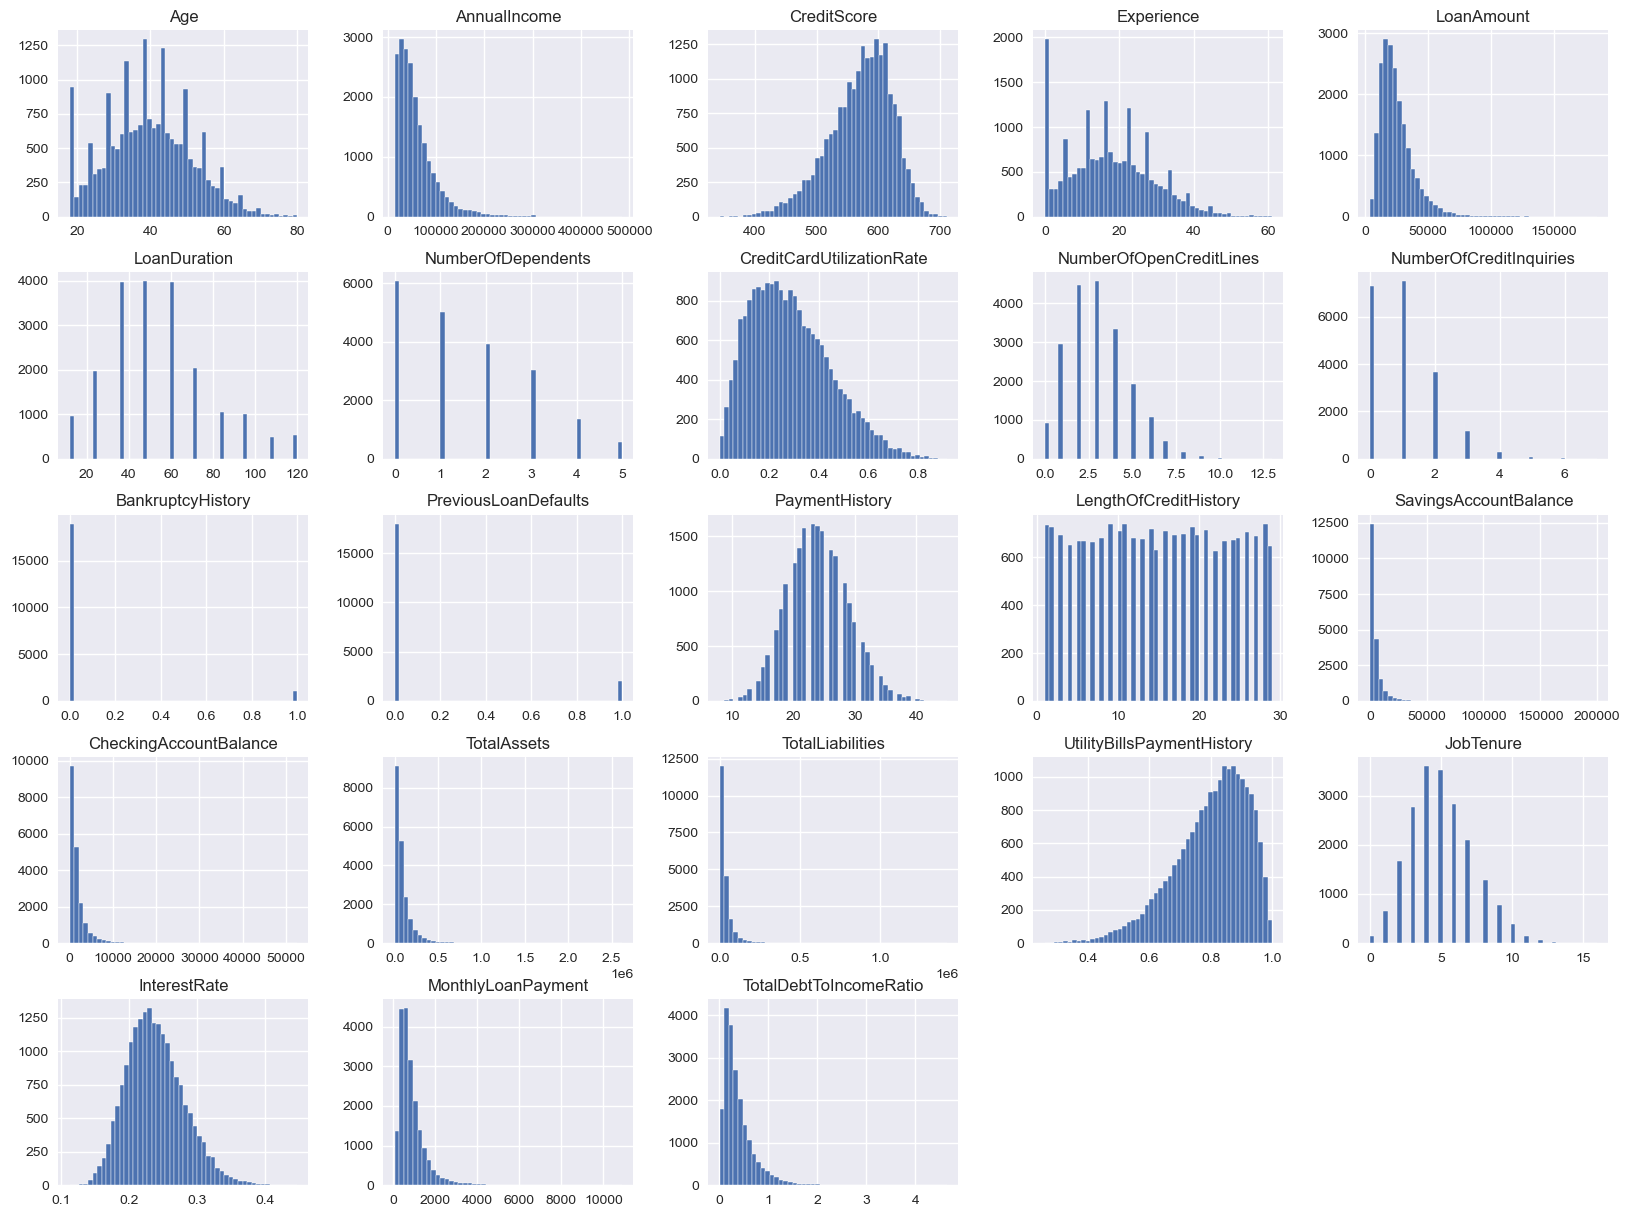

In [38]:
##plot density for all numerical  feature
plt.style.use('seaborn-v0_8')
X.hist(bins = 50, figsize=(20,15))
plt.show()

## Model Training

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [41]:
categorical_features = ['HomeOwnershipStatus','MaritalStatus', 'LoanPurpose']

In [42]:
numeric_features

['Age',
 'AnnualIncome',
 'CreditScore',
 'Experience',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio']

In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop=1 option for categorical transformer

# Custom order for education background, to avoid dimesnionality from 0 to 4
edu_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
educational_encoder = OrdinalEncoder(categories=edu_order)

# Custom order for employment status,to avoid dimesnionality from 0 to 2
emp_order = [['Unemployed', 'Employed', 'Self-Employed']]
employment_encoder = OrdinalEncoder(categories=emp_order)

# Create column transformer with all transformers
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features),
        ("EducationEncoder", educational_encoder, ['EducationLevel']),  # Added education encoder
        ("EmploymentEncoder", employment_encoder, ['EmploymentStatus'])  # Added employment encoder
    ],
    remainder='passthrough'  # Set remainder to passthrough
)

In [44]:
X.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,9,7632,1202,146111,19183,0.724972,11,0.227590,419.805992,0.181077
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9,4627,3460,53204,9595,0.935132,3,0.201077,794.054238,0.389852
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,22,886,895,25176,128874,0.872241,6,0.212548,666.406688,0.462157
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,10,1675,1217,104822,5370,0.896155,5,0.300911,1047.506980,0.313098
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,27,1555,4981,244305,17286,0.941369,5,0.175990,330.179140,0.070210


In [45]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16000, 28), (4000, 28))

In [46]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#### Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.5307
- Mean Absolute Error: 3.6022
- R2 Score: 0.6583
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6747
- Mean Absolute Error: 3.6780
- R2 Score: 0.6480


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.3127
- Mean Absolute Error: 4.2182
- R2 Score: 0.5301
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4072
- Mean Absolute Error: 4.3041
- R2 Score: 0.5291


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.5307
- Mean Absolute Error: 3.6022
- R2 Score: 0.6583
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6747
- Mean Absolute Error: 3.6780
- R2 Score: 0.6480


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.0901
- Mean Absolute Error: 3.2014
- R2 Score: 0.7215
-----------------------

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.799917
6,XGBRegressor,0.771258
5,Random Forest Regressor,0.769322
2,Ridge,0.648034
0,Linear Regression,0.648030
8,AdaBoost Regressor,0.633502
3,K-Neighbors Regressor,0.590819
4,Decision Tree,0.529473
1,Lasso,0.529081


### CatBoosting Regressor

In [50]:
Catboost = CatBoostRegressor(verbose=False)
Catboost_model = Catboost.fit(X_train, y_train)
y_pred = Catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 79.99


## Plot y_pred and y_test

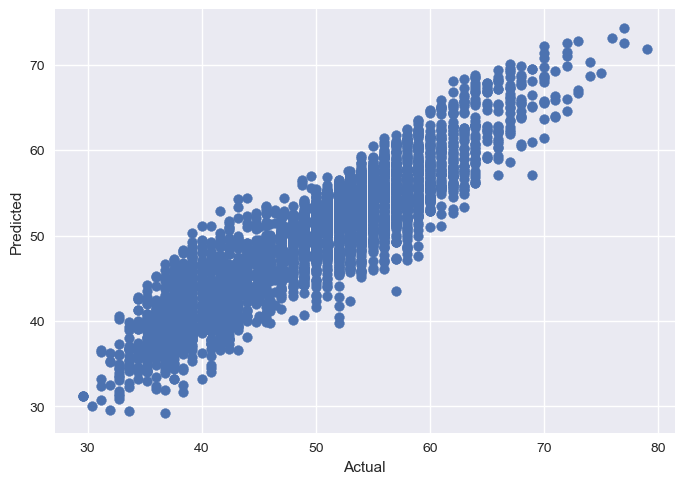

In [51]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

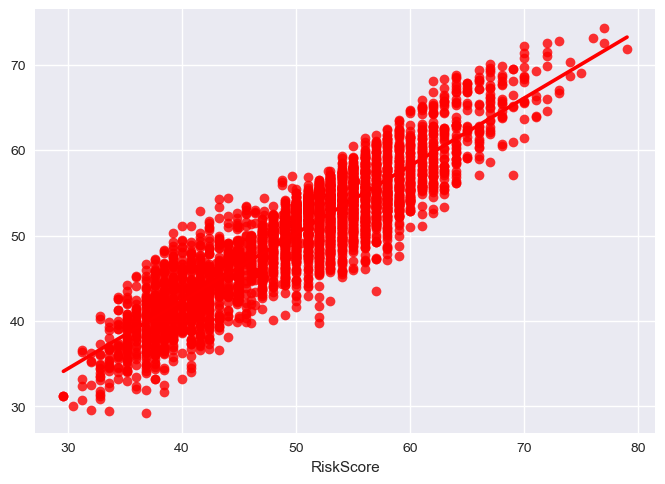

In [52]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
10650,41.6,41.657846,-0.057846
2041,38.4,41.056867,-2.656867
8668,53.0,52.421403,0.578597
1114,50.0,53.631226,-3.631226
13902,51.0,53.954149,-2.954149
...,...,...,...
4073,41.6,43.783647,-2.183647
7442,45.0,45.772903,-0.772903
9999,51.0,53.857141,-2.857141
1870,51.0,54.680510,-3.680510


## COMPONENTS 

In [2]:
import os
import json
import logging
import sys
from io import StringIO 
from pathlib import Path

In [3]:
##create a folder to store all .py files
## Set up folders and paths

source_folder = Path("src")
source_folder.mkdir(exist_ok=True)
(source_folder / "__init__.py").touch()
(source_folder / "components").mkdir(parents=True, exist_ok=True)
(source_folder / "components" / "__init__.py").touch()

sys.path.append(str(source_folder.resolve()))




In [4]:
%%writefile src/logger.py
# Create logger.py
import logging
import os
from datetime import datetime

LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_dir = os.path.join(os.getcwd(), "logs")
os.makedirs(logs_dir, exist_ok=True)

LOG_FILE_PATH = os.path.join(logs_dir, LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[ %(asctime)s ] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO,
)


Overwriting src/logger.py


In [5]:
%%writefile {source_folder}/components/data_ingestion.py

import os
import sys
from src.logger import logging
import pandas as pd

from sklearn.model_selection import train_test_split
from dataclasses import dataclass

from src.components.data_transformation import DataTransformation
from src.components.data_transformation import DataTransformationConfig


from src.components.model_trainer import ModelTrainerConfig
from src.components.model_trainer import ModelTrainer


# This creates a simple class that stores file paths:
@dataclass
class DataIngestionConfig:
    train_data_path: str = os.path.join('artifacts', "train.csv")
    test_data_path: str = os.path.join('artifacts', "test.csv")
    raw_data_path: str = os.path.join('artifacts', "data.csv")
    source_data_path: str = "loan.csv"

class DataIngestion:
    def __init__(self):
        # ingestion_config would save the four variables from class ingestionconfig
        self.ingestion_config = DataIngestionConfig()
        

    def start_data_ingestion(self):
        """Process data ingestion from source CSV to train/test splits
        
        Returns:
            Tuple containing paths to training and testing data files
            
        Raises:
            Exception: If any error occurs during ingestion process
        """
        # this reads the dataset, can be local or from a database
        logging.info("Entered the data ingestion method or components")
        try:
            # Check if source file exists
            if not os.path.exists(self.ingestion_config.source_data_path):
                error_msg = f"Source data file not found: {self.ingestion_config.source_data_path}"
                logging.error(error_msg)
                raise FileNotFoundError(error_msg)
                
            # Read the dataset
            df = pd.read_csv(self.ingestion_config.source_data_path)
            logging.info(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")
            
            ##columns to be dropped, i already worked on the data and know columns that are not neede
            drop_cols = ['ApplicationDate', 'MonthlyIncome', 'BaseInterestRate', 'NetWorth', 'LoanApproved','DebtToIncomeRatio','MonthlyDebtPayments' ]
            df = df.drop(columns=drop_cols)
            print("Remaining columns after drop:", df.columns.tolist())

            
            # create directory to store all the files
            # Creates the "artifacts" directory if it doesn't already exist
            # remember self.ingestion_config.train_data_path is os.path.join('artifacts',"train.csv")
            os.makedirs(os.path.dirname(self.ingestion_config.train_data_path), exist_ok=True)
            
            df.to_csv(self.ingestion_config.raw_data_path, index=False, header=True)
            logging.info('Train test split initiated')
            logging.info("Performing train-test split")
            train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
            
            # initiate and train to these folders
            train_set.to_csv(self.ingestion_config.train_data_path, index=False, header=True)
            logging.info(f"Saved training data with {train_set.shape[0]} rows to {self.ingestion_config.train_data_path}")

            test_set.to_csv(self.ingestion_config.test_data_path, index=False, header=True)
            logging.info(f"Saved testing data with {test_set.shape[0]} rows to {self.ingestion_config.test_data_path}")

            logging.info("Ingestion of the data is completed")

            return (
                self.ingestion_config.train_data_path,
                self.ingestion_config.test_data_path
            )
            
        except Exception as e:
            # this prints the error and re-raises it so it's not silently ignored
            logging.error(f"Error during data ingestion: {e}")
            raise e


if __name__ == "__main__":
    try:
        obj = DataIngestion()
        train_data, test_data = obj.start_data_ingestion()
        print("Data ingestion completed successfully!")
        print(f"Training data: {train_data}")
        print(f"Testing data: {test_data}")
        
        data_transformation = DataTransformation()
        train_arr,test_arr,transformer_path = data_transformation.initiate_data_transformation(train_data, test_data)
        print('the pickle file for transformer has been created')

        modeltrainer = ModelTrainer()
        modeltrainer.initiate_model_trainer(train_arr,test_arr)
        print("model sucessfully trained")
        
        
        
        
    except Exception as err:
        print(f"Failed to ingest data or transform data: {err}")


Overwriting src/components/data_ingestion.py


In [10]:
!python -m src.components.data_ingestion


Remaining columns after drop: ['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore']
Data ingestion completed successfully!
Training data: artifacts/train.csv
Testing data: artifacts/test.csv
the pickle file for transformer has been created
Model: Random Forest, Train R²: 0.9675, Test R²: 0.7697
Model: Decision Tree, Train R²: 1.0000, Test R²: 0.5224
Model: Gradient Boosting, Train R²: 0.7923, Test R²: 0.7742
Model: Linear Regression, Train R²: 0.6583, Test R²: 0.6480
Model: 

In [6]:
%%writefile {source_folder}/utils.py

import os
import sys
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import r2_score

def save_object(file_path, obj):
    """
    Save a Python object to disk using joblib
    
    Parameters:
    -----------
    file_path : str
        Path where the object will be saved
    obj : object
        Any Python object to be saved
    """
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        joblib.dump(obj, file_path, compress=3)
    except Exception as e:
        print(f"Error saving object: {e}")

def evaluate_models(X_train, y_train, X_test, y_test, models):
    """
    Evaluate multiple models and return their performance metrics
    
    Parameters:
    -----------
    X_train : array-like
        Training features
    y_train : array-like
        Training target
    X_test : array-like
        Test features
    y_test : array-like
        Test target
    models : dict
        Dictionary of models to evaluate {name: model}
        
    Returns:
    --------
    dict
        Dictionary of model names and their test R² scores
    """
    try:
        report = {}
        for i in range(len(list(models))):
            model = list(models.values())[i]
            model_name = list(models.keys())[i]
            
            # Train model
            model.fit(X_train, y_train)
            
            # Predict
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Evaluate
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            
            # Save score to report
            report[model_name] = test_r2
            
            print(f"Model: {model_name}, Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
            
        return report
    except Exception as e:
        print(f"Error in model evaluation: {e}")
        return None

def load_object(filepath):
    """
    Load a Python object from disk using joblib
    
    Parameters:
    -----------
    filepath : str
        Path to the saved object
        
    Returns:
    --------
    object
        The loaded object
    """
    try:
        return joblib.load(filepath)
    except Exception as e:
        raise Exception(f"Error loading object from {filepath}: {e}")


Overwriting src/utils.py


In [7]:
%%writefile {source_folder}/components/data_transformation.py



import sys
from src.logger import logging
import os
from dataclasses import dataclass

import numpy as np 
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from src.utils import save_object

@dataclass
class DataTransformationConfig:
    preprocessor_transfomer_path: str = os.path.join('artifacts', "preprocessor.pkl")

class DataTransformation:
    def __init__(self):
        self.data_transformation_config = DataTransformationConfig()

    def get_data_transformer_object(self):
        """
        this function will transform the data
        """
        try:
            ##define all variables needed for the preprocessor
            numeric_features = ['Age','AnnualIncome','CreditScore','Experience',
                                'LoanAmount','LoanDuration','NumberOfDependents','CreditCardUtilizationRate',
                                 'NumberOfOpenCreditLines','NumberOfCreditInquiries','BankruptcyHistory','PreviousLoanDefaults',
                                 'PaymentHistory','LengthOfCreditHistory','SavingsAccountBalance','CheckingAccountBalance',
                                 'TotalAssets','TotalLiabilities','UtilityBillsPaymentHistory','JobTenure',
                                 'InterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio']
            
            categorical_features = ['HomeOwnershipStatus','MaritalStatus', 'LoanPurpose']
            education_feature = ['EducationLevel']
            employment_feature = ['EmploymentStatus']
            
            # Custom orders to avoid dcurse of dimensionality
            ##target encoding could also be done to other categorical features
            edu_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
            emp_order = [['Unemployed', 'Employed', 'Self-Employed']]

            # Define transformers / pipeline
            num_pipeline = Pipeline(
                steps= [
                    ('imputer', SimpleImputer(strategy = "median")),
                    ('scaler', StandardScaler()), 
                    ]
            )
            cat_pipeline = Pipeline(
                steps = [
                    ("imputer",SimpleImputer(strategy="most_frequent")),
                    ("one_hot_encoder",OneHotEncoder(handle_unknown="ignore",drop='first'))
                ]
            )
            education_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ordinal_encoder', OrdinalEncoder(categories=edu_order))
                ])

            employment_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ordinal_encoder', OrdinalEncoder(categories=emp_order))
                ])
            
            # show me what features are being used
            logging.info(f"Categorical columns: {categorical_features + education_feature + employment_feature}")
            logging.info(f"Numerical columns: {numeric_features}")

            # Create column transformer with all transformers
            # Combine all

            logging.info("creating the joint preprocessor")
            
            preprocessor = ColumnTransformer(transformers=[
                ('num', num_pipeline, numeric_features),
                ('nominal_cat', cat_pipeline, categorical_features),
                ('education_ord', education_pipeline, education_feature),
                ('employment_ord', employment_pipeline, employment_feature)
            ])

            logging.info("the preprocessor works")
            return preprocessor
        
        except Exception as e:
            # This catches and logs the error so we know what failed
            logging.error(f"Error in get_data_transformer_object: {e}")
            raise e

    def initiate_data_transformation(self, train_path, test_path):
        """
        Aim is to transform the data from data ingestion
        """

        try:
            # load the csv file
            train_df = pd.read_csv(train_path)
            test_df = pd.read_csv(test_path)

            logging.info("Read train and test data completed")

            logging.info("Obtaining preprocessing object")

            # get the transformer pkl
            preprocessing_transformer = self.get_data_transformer_object()

            numeric_features = ['Age','AnnualIncome','CreditScore','Experience',
                                'LoanAmount','LoanDuration','NumberOfDependents','CreditCardUtilizationRate',
                                 'NumberOfOpenCreditLines','NumberOfCreditInquiries','BankruptcyHistory','PreviousLoanDefaults',
                                 'PaymentHistory','LengthOfCreditHistory','SavingsAccountBalance','CheckingAccountBalance',
                                 'TotalAssets','TotalLiabilities','UtilityBillsPaymentHistory','JobTenure',
                                 'InterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio']
            
            categorical_features = ['HomeOwnershipStatus','MaritalStatus', 'LoanPurpose']
            education_feature = ['EducationLevel']
            employment_feature = ['EmploymentStatus']
            

            # define the column with the target
            target_column_name = "RiskScore"

            # separate X and y
            input_feature_train_df = train_df.drop(columns=[target_column_name], axis=1)
            target_feature_train_df = train_df[target_column_name]

            input_feature_test_df = test_df.drop(columns=[target_column_name], axis=1)
            target_feature_test_df = test_df[target_column_name]

            logging.info(
                f"Applying preprocessing object on training dataframe and testing dataframe."
            )
            expected_columns = numeric_features + categorical_features + education_feature + employment_feature
            missing_columns = [col for col in expected_columns if col not in input_feature_train_df.columns]

            if missing_columns:
                raise ValueError(f"The following expected columns are missing from the dataset: {missing_columns}")

            # transform X
            input_feature_train_arr = preprocessing_transformer.fit_transform(input_feature_train_df)
            input_feature_test_arr = preprocessing_transformer.transform(input_feature_test_df)

            ### column-wise concatenation of X, y 
            train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
            test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

            logging.info(f"Saved preprocessing object.")

            # save the preprocessor pkl file
            save_object(
                file_path=self.data_transformation_config.preprocessor_transfomer_path,
                obj=preprocessing_transformer
            )

            return (
                train_arr,
                test_arr,
                self.data_transformation_config.preprocessor_transfomer_path,
            )
        except Exception as e:
            # This logs and rethrows the exception to avoid silent failure
            logging.error(f"Error in initiate_data_transformation: {e}")
            raise e

        
           

Overwriting src/components/data_transformation.py


In [9]:
%%writefile {source_folder}/components/model_trainer.py



import os
import sys
from dataclasses import dataclass

from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


from src.logger import logging

from src.utils import save_object,evaluate_models


@dataclass
class ModelTrainerConfig:
    trained_model_file_path = os.path.join('artifacts', 'model.pkl')


class ModelTrainer:
    def __init__(self):
        self.model_trainer_config = ModelTrainerConfig()


    def initiate_model_trainer(self,train_array,test_array):
        try:
            logging.info("splitting test and train input data")
            X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )
            models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }
            
            model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models)

            
            if model_report is None:
                raise ValueError("Model evaluation failed. No report was returned.")
            ## get best model score from dict
            best_model_score = max(sorted(model_report.values()))

            ## To get best model name from dict
            best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)
            ]
            
            best_model = models[best_model_name]

            if best_model_score < 0.6:
                raise ValueError("The value score is low")
            
            # This code only runs if best_model_score >= 0.6
            logging.info(f"Best found model on both training and testing dataset")
            save_object(
                file_path=self.model_trainer_config.trained_model_file_path,
                obj=best_model
            )
            predicted = best_model.predict(X_test)
            r2_square = r2_score(y_test, predicted)
            return r2_square
            
        except Exception as e:
            # Code to handle the exception
            print(f"An error occurred: {e}")
            

Overwriting src/components/model_trainer.py


### PIPELINE

In [11]:
(source_folder / "pipeline").mkdir(parents=True, exist_ok=True)
(source_folder / "pipeline" / "__init__.py").touch()

In [12]:
%%writefile {source_folder}/pipeline/predict_pipeline.py

import sys
import pandas as pd
import numpy as np
from src.logger import logging

from src.utils import load_object


class PredictPipeline:
    def __init__(self):
        pass
    def predict(self, features):
        try:
            model_path = "artifacts/model.pkl"
            preprocessor_path = "artifacts/preprocessor.pkl"
            model = load_object(model_path)
            preprocessor = load_object(preprocessor_path)
            data_scaled = preprocessor.transform(features)
            preds = model.predict(data_scaled)
            return preds
        except Exception as e:
            raise Exception(f"Error arising from loading the transformers: {e}")

        
        
        

class CustomData:
    def __init__(self, Age, AnnualIncome, CreditScore, EmploymentStatus,
                 EducationLevel, Experience, LoanAmount, LoanDuration,
                 MaritalStatus, NumberOfDependents, HomeOwnershipStatus,
                 CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries,
                 BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory,
                 SavingsAccountBalance, CheckingAccountBalance, TotalAssets,
                 TotalLiabilities, UtilityBillsPaymentHistory, JobTenure,
                 InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio):

        self.Age = Age
        self.AnnualIncome = AnnualIncome
        self.CreditScore = CreditScore
        self.EmploymentStatus = EmploymentStatus
        self.EducationLevel = EducationLevel
        self.Experience = Experience
        self.LoanAmount = LoanAmount
        self.LoanDuration = LoanDuration
        self.MaritalStatus = MaritalStatus
        self.NumberOfDependents = NumberOfDependents
        self.HomeOwnershipStatus = HomeOwnershipStatus
        self.CreditCardUtilizationRate = CreditCardUtilizationRate
        self.NumberOfOpenCreditLines = NumberOfOpenCreditLines
        self.NumberOfCreditInquiries = NumberOfCreditInquiries
        self.BankruptcyHistory = BankruptcyHistory
        self.LoanPurpose = LoanPurpose
        self.PreviousLoanDefaults = PreviousLoanDefaults
        self.PaymentHistory = PaymentHistory
        self.LengthOfCreditHistory = LengthOfCreditHistory
        self.SavingsAccountBalance = SavingsAccountBalance
        self.CheckingAccountBalance = CheckingAccountBalance
        self.TotalAssets = TotalAssets
        self.TotalLiabilities = TotalLiabilities
        self.UtilityBillsPaymentHistory = UtilityBillsPaymentHistory
        self.JobTenure = JobTenure
        self.InterestRate = InterestRate
        self.MonthlyLoanPayment = MonthlyLoanPayment
        self.TotalDebtToIncomeRatio = TotalDebtToIncomeRatio

    def get_data_as_data_frame(self):
        try:
            custom_data_input_dict = {
                "Age": [self.Age],
                "AnnualIncome": [self.AnnualIncome],
                "CreditScore": [self.CreditScore],
                "EmploymentStatus": [self.EmploymentStatus],
                "EducationLevel": [self.EducationLevel],
                "Experience": [self.Experience],
                "LoanAmount": [self.LoanAmount],
                "LoanDuration": [self.LoanDuration],
                "MaritalStatus": [self.MaritalStatus],
                "NumberOfDependents": [self.NumberOfDependents],
                "HomeOwnershipStatus": [self.HomeOwnershipStatus],
                "CreditCardUtilizationRate": [self.CreditCardUtilizationRate],
                "NumberOfOpenCreditLines": [self.NumberOfOpenCreditLines],
                "NumberOfCreditInquiries": [self.NumberOfCreditInquiries],
                "BankruptcyHistory": [self.BankruptcyHistory],
                "LoanPurpose": [self.LoanPurpose],
                "PreviousLoanDefaults": [self.PreviousLoanDefaults],
                "PaymentHistory": [self.PaymentHistory],
                "LengthOfCreditHistory": [self.LengthOfCreditHistory],
                "SavingsAccountBalance": [self.SavingsAccountBalance],
                "CheckingAccountBalance": [self.CheckingAccountBalance],
                "TotalAssets": [self.TotalAssets],
                "TotalLiabilities": [self.TotalLiabilities],
                "UtilityBillsPaymentHistory": [self.UtilityBillsPaymentHistory],
                "JobTenure": [self.JobTenure],
                "InterestRate": [self.InterestRate],
                "MonthlyLoanPayment": [self.MonthlyLoanPayment],
                "TotalDebtToIncomeRatio": [self.TotalDebtToIncomeRatio]
            }

            return pd.DataFrame(custom_data_input_dict)
        except Exception as e:
            raise Exception(f"Error creating DataFrame from input data: {e}")


Overwriting src/pipeline/predict_pipeline.py


### FLASK/WEB PAGE

In [13]:
os.makedirs('templates', exist_ok=True) 

In [14]:
%%writefile templates/index.html

<h1>Welcome to the home page</h1>

Overwriting templates/index.html


In [15]:
%%writefile templates/home.html

<html>
<html>
<head>
    <title>Loan Risk Score Prediction</title>
</head>
<body>
    <div class="login">
        <h1>Loan Risk Score Prediction</h1>

        <form action="{{ url_for('predict_datapoint') }}" method="post">
            <h2>Enter Customer Data</h2>

            <label>Age:</label>
            <input type="number" name="Age" required><br>

            <label>Annual Income:</label>
            <input type="number" name="AnnualIncome" step="0.01" required><br>

            <label>Credit Score:</label>
            <input type="number" name="CreditScore" step="0.01" required><br>

            <label>Employment Status:</label>
            <select name="EmploymentStatus" required>
                <option disabled selected value="">Select</option>
                <option value="Employed">Employed</option>
                <option value="Unemployed">Unemployed</option>
                <option value="Self-Employed">Self-Employed</option>
            </select><br>

            <label>Education Level:</label>
            <select name="EducationLevel" required>
                <option disabled selected value="">Select</option>
                <option value="High School">High School</option>
                <option value="Associate">Associate</option>
                <option value="Bachelor">Bachelor</option>
                <option value="Master">Master</option>
                <option value="Doctorate">Doctorate</option>
            </select><br>

            <label>Experience (years):</label>
            <input type="number" name="Experience" required><br>

            <label>Loan Amount:</label>
            <input type="number" name="LoanAmount" step="0.01" required><br>

            <label>Loan Duration (months):</label>
            <input type="number" name="LoanDuration" required><br>

            <label>Marital Status:</label>
            <select name="MaritalStatus" required>
                <option disabled selected value="">Select</option>
                <option value="Single">Single</option>
                <option value="Married">Married</option>
                <option value="Divorced">Divorced</option>
            </select><br>

            <label>Number of Dependents:</label>
            <input type="number" name="NumberOfDependents" required><br>

            <label>Home Ownership Status:</label>
            <select name="HomeOwnershipStatus" required>
                <option disabled selected value="">Select</option>
                <option value="Own">Own</option>
                <option value="Rent">Rent</option>
                <option value="Mortgage">Mortgage</option>
            </select><br>

            <label>Credit Card Utilization Rate:</label>
            <input type="number" name="CreditCardUtilizationRate" step="0.01" min="0" max="1" required><br>

            <label>Number of Open Credit Lines:</label>
            <input type="number" name="NumberOfOpenCreditLines" required><br>

            <label>Number of Credit Inquiries:</label>
            <input type="number" name="NumberOfCreditInquiries" required><br>

            <label>Bankruptcy History:</label>
            <input type="number" name="BankruptcyHistory" required><br>

            <label>Loan Purpose:</label>
            <select name="LoanPurpose" required>
                <option disabled selected value="">Select</option>
                <option value="Debt Consolidation">Debt Consolidation</option>
                <option value="Home Improvement">Home Improvement</option>
                <option value="Education">Education</option>
                <option value="Medical">Medical</option>
                <option value="Personal">Personal</option>
            </select><br>

            <label>Previous Loan Defaults:</label>
            <input type="number" name="PreviousLoanDefaults" required><br>

            <label>Payment History Score:</label>
            <input type="number" name="PaymentHistory" step="0.01" min="0" max="1" required><br>

            <label>Length of Credit History:</label>
            <input type="number" name="LengthOfCreditHistory" step="0.01" required><br>

            <label>Savings Account Balance:</label>
            <input type="number" name="SavingsAccountBalance" step="0.01" required><br>

            <label>Checking Account Balance:</label>
            <input type="number" name="CheckingAccountBalance" step="0.01" required><br>

            <label>Total Assets:</label>
            <input type="number" name="TotalAssets" step="0.01" required><br>

            <label>Total Liabilities:</label>
            <input type="number" name="TotalLiabilities" step="0.01" required><br>

            <label>Utility Bills Payment History:</label>
            <input type="number" name="UtilityBillsPaymentHistory" step="0.01" min="0" max="1" required><br>

            <label>Job Tenure (years):</label>
            <input type="number" name="JobTenure" required><br>

            <label>Interest Rate:</label>
            <input type="number" name="InterestRate" step="0.01" min="0" max="100" required><br>

            <label>Monthly Loan Payment:</label>
            <input type="number" name="MonthlyLoanPayment" step="0.01" required><br>

            <label>Total Debt To Income Ratio:</label>
            <input type="number" name="TotalDebtToIncomeRatio" step="0.01" min="0" max="1" required><br>

            <br>
            <input type="submit" value="Predict Risk Score">
        </form>

        <h2>Predicted Risk Score: {{ results }}</h2>
    </div>
</body>
</html>



Overwriting templates/home.html


In [16]:
%%writefile app.py

from flask import Flask,request,render_template
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from src.pipeline.predict_pipeline import CustomData,PredictPipeline

application=Flask(__name__)

app = application 

##Route for Homepage

@app.route("/")
def index():
    return render_template('index.html')

@app.route("/predictdata",methods= ['GET','POST'])
def predict_datapoint():
    if request.method =="GET":
        return render_template('home.html')

    else:
        data=CustomData(
        Age=int(request.form.get('Age')),
        AnnualIncome=float(request.form.get('AnnualIncome')),
        CreditScore=float(request.form.get('CreditScore')),
        EmploymentStatus=request.form.get('EmploymentStatus'),
        EducationLevel=request.form.get('EducationLevel'),
        Experience=int(request.form.get('Experience')),
        LoanAmount=float(request.form.get('LoanAmount')),
        LoanDuration=int(request.form.get('LoanDuration')),
        MaritalStatus=request.form.get('MaritalStatus'),
        NumberOfDependents=int(request.form.get('NumberOfDependents')),
        HomeOwnershipStatus=request.form.get('HomeOwnershipStatus'),
        CreditCardUtilizationRate=float(request.form.get('CreditCardUtilizationRate')),
        NumberOfOpenCreditLines=int(request.form.get('NumberOfOpenCreditLines')),
        NumberOfCreditInquiries=int(request.form.get('NumberOfCreditInquiries')),
        BankruptcyHistory=int(request.form.get('BankruptcyHistory')),
        LoanPurpose=request.form.get('LoanPurpose'),
        PreviousLoanDefaults=int(request.form.get('PreviousLoanDefaults')),
        PaymentHistory=float(request.form.get('PaymentHistory')),
        LengthOfCreditHistory=float(request.form.get('LengthOfCreditHistory')),
        SavingsAccountBalance=float(request.form.get('SavingsAccountBalance')),
        CheckingAccountBalance=float(request.form.get('CheckingAccountBalance')),
        TotalAssets=float(request.form.get('TotalAssets')),
        TotalLiabilities=float(request.form.get('TotalLiabilities')),
        UtilityBillsPaymentHistory=float(request.form.get('UtilityBillsPaymentHistory')),
        JobTenure=int(request.form.get('JobTenure')),
        InterestRate=float(request.form.get('InterestRate')),
        MonthlyLoanPayment=float(request.form.get('MonthlyLoanPayment')),
        TotalDebtToIncomeRatio=float(request.form.get('TotalDebtToIncomeRatio'))
        )

        pred_df = data.get_data_as_data_frame()
        print(pred_df)

        predict_pipeline= PredictPipeline()
        results = predict_pipeline.predict(pred_df)
        #print(results)  # Output: array([68.741292]), results[0] is: 68.741292 
        return render_template('home.html',results=results[0])


##if __name__=="__main__":
    #app.run(host="0.0.0.0",debug = True) 
if __name__ == "__main__":
    # Important: Use host="0.0.0.0" to make the app accessible outside the container
    app.run(host="0.0.0.0", debug=True, port=5001)


Overwriting app.py


In [17]:
!python app.py

 * Serving Flask app 'app'
 * Debug mode: on
   Age  AnnualIncome  ...  MonthlyLoanPayment TotalDebtToIncomeRatio
0   28      150000.0  ...               420.0                   0.36

[1 rows x 28 columns]
^C


### CREATE DOCKER FILE

In [22]:
%%writefile Dockerfile

FROM python:3.11-slim-buster

WORKDIR /app

COPY . /app

RUN apt update -y && apt install -y ca-certificates curl gnupg
# Azure CLI installation can be added here if needed:
# RUN curl -sL https://aka.ms/InstallAzureCLIDeb | bash

RUN pip install --upgrade pip && pip install -r requirements.txt

EXPOSE 5001

CMD ["python3", "app.py"]


Overwriting Dockerfile
